## Correlation Heatmap

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
from itertools import combinations
from datetime import timedelta
import yfinance as yf

#### Test Yfinance

In [3]:
data = yf.download('AAPL', start='2020-01-01', end='2025-11-30')


print(f"number of lines : {data.size}")
print("\n"*5, data.head())
print("\n"*5, np.mean(data["Close"]))

[*********************100%***********************]  1 of 1 completed

number of lines : 7430





 Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2020-01-02  72.468262  72.528582  71.223259  71.476600  135480400
2020-01-03  71.763725  72.523754  71.539337  71.696167  146322800
2020-01-06  72.335541  72.374146  70.634524  70.885457  118387200
2020-01-07  71.995354  72.600960  71.775789  72.345204  108872000
2020-01-08  73.153488  73.455087  71.698574  71.698574  132079200





 163.29290035756088


### 1. Récupération des Cotations

#### Actions

In [4]:
ticker_list_act = ["AAPL", "MSFT", "NVDA", "TSLA", "AMZN"]
data_act = yf.download(ticker_list_act, start='2020-01-01', threads=True)
prices_act = data_act["Close"]
print(prices_act)

[*********************100%***********************]  5 of 5 completed


Ticker            AAPL        AMZN        MSFT        NVDA        TSLA
Date                                                                  
2020-01-02   72.468269   94.900497  152.505692    5.971077   28.684000
2020-01-03   71.763733   93.748497  150.606720    5.875504   29.534000
2020-01-06   72.335556   95.143997  150.995987    5.900145   30.102667
2020-01-07   71.995369   95.343002  149.619278    5.971576   31.270666
2020-01-08   73.153488   94.598503  152.002441    5.982776   32.809334
...                ...         ...         ...         ...         ...
2025-12-26  273.399994  232.520004  487.709991  190.529999  475.190002
2025-12-29  273.760010  232.070007  487.100006  188.220001  459.640015
2025-12-30  273.079987  232.529999  487.480011  187.539993  454.429993
2025-12-31  271.859985  230.820007  483.619995  186.500000  449.720001
2026-01-02  271.010010  226.500000  472.940002  188.850006  438.070007

[1509 rows x 5 columns]


#### Indices

In [5]:
ticker_list_ind = ['^GSPC', '^NDX']
data_ind = yf.download(ticker_list_ind, start='2020-01-01', threads=True)
prices_ind = data_ind["Close"]

rename_dict = {
    '^NDX': 'Nasdaq',
    '^GSPC': 'S&P500',
}

prices_ind = prices_ind.rename(columns=rename_dict)
print(prices_ind)

[*********************100%***********************]  2 of 2 completed

Ticker           S&P500        Nasdaq
Date                                 
2020-01-02  3257.850098   8872.219727
2020-01-03  3234.850098   8793.900391
2020-01-06  3246.280029   8848.519531
2020-01-07  3237.179932   8846.450195
2020-01-08  3253.050049   8912.370117
...                 ...           ...
2025-12-26  6929.939941  25644.390625
2025-12-29  6905.740234  25525.560547
2025-12-30  6896.240234  25462.560547
2025-12-31  6845.500000  25249.849609
2026-01-02  6858.470215  25206.169922

[1509 rows x 2 columns]


#### FX pairs

In [6]:
ticker_list_fx = ['EURUSD=X', 'USDJPY=X', 'AUDUSD=X', 'GBPUSD=X', 'USDCHF=X']
data_fx = yf.download(ticker_list_fx, start='2020-01-01', threads=True)
prices_fx = data_fx["Close"]

rename_dict = {
    "EURUSD=X" : "EUR/USD",
    "USDJPY=X" : "USD/JPY",
    "AUDUSD=X" : "AUD/USD",
    "GBPUSD=X" : "GBP/USD",
    "USDCHF=X" : "USD/CHF" 
}

prices_fx = prices_fx.rename(columns=rename_dict)
print(prices_fx)

[*********************100%***********************]  5 of 5 completed

Ticker       AUD/USD   EUR/USD   GBP/USD  USD/CHF     USD/JPY
Date                                                         
2020-01-01  0.701700  1.122083  1.326260  0.96720  108.681000
2020-01-02  0.701951  1.122083  1.325030  0.96750  108.712997
2020-01-03  0.698519  1.117144  1.315270  0.97120  108.542999
2020-01-06  0.694420  1.116196  1.308010  0.97148  107.963997
2020-01-07  0.693731  1.119799  1.317003  0.96850  108.405998
...              ...       ...       ...      ...         ...
2025-12-29  0.671410  1.177274  1.349728  0.78924  156.462997
2025-12-30  0.669550  1.177288  1.351099  0.78870  156.013000
2025-12-31  0.669800  1.174729  1.346720  0.79170  156.412994
2026-01-02  0.667830  1.175047  1.347364  0.79203  156.731003
2026-01-04  0.669478       NaN  1.346040  0.79070  156.759995

[1564 rows x 5 columns]


#### Commodities

In [7]:
ticker_list_commo = ['GC=F','CL=F','HG=F', 'SI=F']
data_commo = yf.download(ticker_list_commo, start='2020-01-01', threads=True)
prices_commo = data_commo["Close"]

rename_dict = {
    "GC=F" : "Or",
    "CL=F" : "Pétrole",
    "HG=F" : "Cuivre",
    "SI=F" : "Argent",
}

prices_commo = prices_commo.rename(columns=rename_dict)
print(prices_commo)

[*********************100%***********************]  4 of 4 completed

Ticker        Pétrole           Or  Cuivre     Argent
Date                                                 
2020-01-02  61.180000  1524.500000  2.8330  17.966000
2020-01-03  63.049999  1549.199951  2.7985  18.068001
2020-01-06  63.270000  1566.199951  2.8005  18.097000
2020-01-07  62.700001  1571.800049  2.8040  18.316000
2020-01-08  59.610001  1557.400024  2.8190  18.087999
...               ...          ...     ...        ...
2025-12-26  56.740002  4529.100098  5.7665  76.486000
2025-12-29  58.080002  4325.100098  5.4905  69.856003
2025-12-30  57.950001  4370.100098  5.7275  77.374001
2025-12-31  57.419998  4325.600098  5.6300  70.134003
2026-01-02  57.320000  4329.600098  5.6915  71.014999

[1512 rows x 4 columns]


#### OAT

In [8]:
ticker_list_rates = ['^IRX', '^FVX','^TNX']
data_rates = yf.download(ticker_list_rates, start='2020-01-01', threads=True)
prices_rates = data_rates["Close"]

rename_dict = {
    "^IRX" : "Taux US 2 ans",
    "^FVX" : "Taux US 5 ans",
    "^TNX" : "Taux US 10 ans",
}

prices_rates = prices_rates.rename(columns=rename_dict)
new_order = ["Taux US 2 ans", "Taux US 5 ans", "Taux US 10 ans"]
prices_rates = prices_rates[new_order]
print(prices_rates.head())
print(prices_rates.tail())

[*********************100%***********************]  3 of 3 completed

Ticker      Taux US 2 ans  Taux US 5 ans  Taux US 10 ans
Date                                                    
2020-01-02          1.495          1.671           1.882
2020-01-03          1.473          1.586           1.788
2020-01-06          1.488          1.611           1.811
2020-01-07          1.500          1.619           1.827
2020-01-08          1.493          1.665           1.874
Ticker      Taux US 2 ans  Taux US 5 ans  Taux US 10 ans
Date                                                    
2025-12-26          3.543          3.697           4.136
2025-12-29          3.538          3.677           4.116
2025-12-30          3.540          3.682           4.130
2025-12-31          3.547          3.722           4.163
2026-01-02          3.533          3.739           4.187


#### Visualisation graphique avec plotly

On regarde l'évolution du prix des actions de 2020 à aujourd'hui

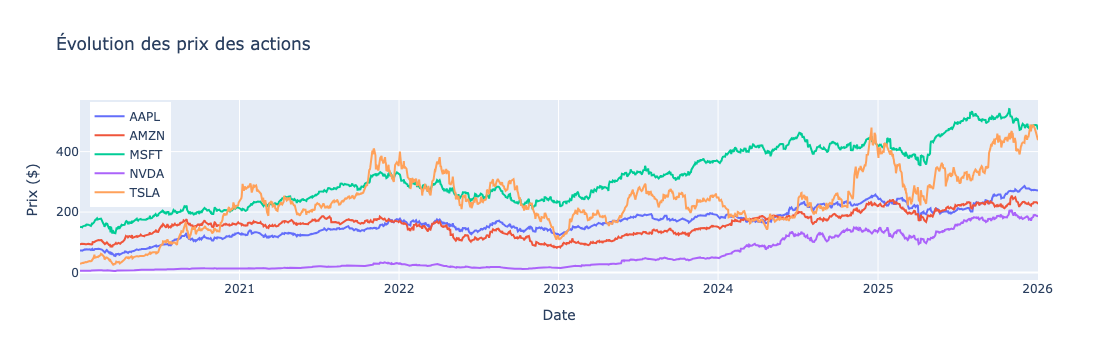

In [9]:
fig = go.Figure()

for ticker in prices_act.columns:
    fig.add_trace(go.Scatter(
        x=prices_act.index, 
        y=prices_act[ticker],
        mode='lines',
        name=ticker
    ))

fig.update_layout(
    title='Évolution des prix des actions',
    xaxis_title='Date',
    yaxis_title='Prix ($)',
    hovermode='x unified',
    legend=dict(x=0.01, y=0.99)
)

fig.show()

De même avec les prix normalisés (chaque action est ramenée à un "prix" de 100$ à la date initiale)

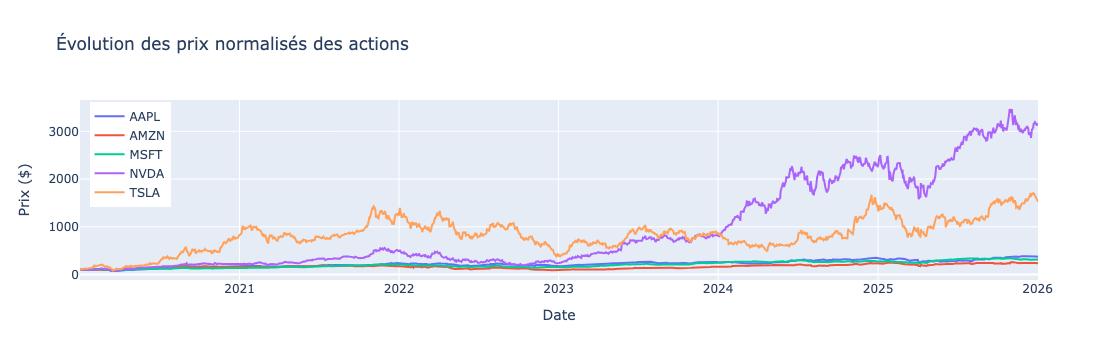

In [10]:
fig2 = go.Figure()

prices_normalized = (prices_act / prices_act.iloc[0]) * 100

for ticker in prices_normalized.columns:
    fig2.add_trace(go.Scatter(
        x=prices_normalized.index, 
        y=prices_normalized[ticker],
        mode='lines',
        name=ticker
    ))

fig2.update_layout(
    title='Évolution des prix normalisés des actions',
    xaxis_title='Date',
    yaxis_title='Prix ($)',
    hovermode='x unified',
    legend=dict(x=0.01, y=0.99)
)

fig2.show()

### 2. Rolling Correlations

#### Log Rendements

In [11]:
prices = pd.concat([prices_act, prices_ind, prices_fx, prices_commo, prices_rates], axis = 1, join='inner')
print(prices)

Ticker            AAPL        AMZN        MSFT        NVDA        TSLA  \
Date                                                                     
2020-01-02   72.468269   94.900497  152.505692    5.971077   28.684000   
2020-01-03   71.763733   93.748497  150.606720    5.875504   29.534000   
2020-01-06   72.335556   95.143997  150.995987    5.900145   30.102667   
2020-01-07   71.995369   95.343002  149.619278    5.971576   31.270666   
2020-01-08   73.153488   94.598503  152.002441    5.982776   32.809334   
...                ...         ...         ...         ...         ...   
2025-12-26  273.399994  232.520004  487.709991  190.529999  475.190002   
2025-12-29  273.760010  232.070007  487.100006  188.220001  459.640015   
2025-12-30  273.079987  232.529999  487.480011  187.539993  454.429993   
2025-12-31  271.859985  230.820007  483.619995  186.500000  449.720001   
2026-01-02  271.010010  226.500000  472.940002  188.850006  438.070007   

Ticker           S&P500        Nasdaq

In [12]:
log_returns = np.log(prices / prices.shift(1))
print(log_returns)

Ticker          AAPL      AMZN      MSFT      NVDA      TSLA    S&P500  \
Date                                                                     
2020-01-02       NaN       NaN       NaN       NaN       NaN       NaN   
2020-01-03 -0.009770 -0.012213 -0.012530 -0.016135  0.029203 -0.007085   
2020-01-06  0.007937  0.014776  0.002581  0.004185  0.019072  0.003527   
2020-01-07 -0.004714  0.002089 -0.009159  0.012034  0.038067 -0.002807   
2020-01-08  0.015958 -0.007839  0.015803  0.001874  0.048033  0.004890   
...              ...       ...       ...       ...       ...       ...   
2025-12-26 -0.001499  0.000602 -0.000635  0.010128 -0.021259 -0.000304   
2025-12-29  0.001316 -0.001937 -0.001251 -0.012198 -0.033271 -0.003498   
2025-12-30 -0.002487  0.001980  0.000780 -0.003619 -0.011400 -0.001377   
2025-12-31 -0.004478 -0.007381 -0.007950 -0.005561 -0.010419 -0.007385   
2026-01-02 -0.003131 -0.018893 -0.022331  0.012522 -0.026246  0.001893   

Ticker        Nasdaq   AUD/USD   EUR/

/opt/anaconda3/lib/python3.13/site-packages/pandas/core/internals/blocks.py:395: RuntimeWarning:

invalid value encountered in log



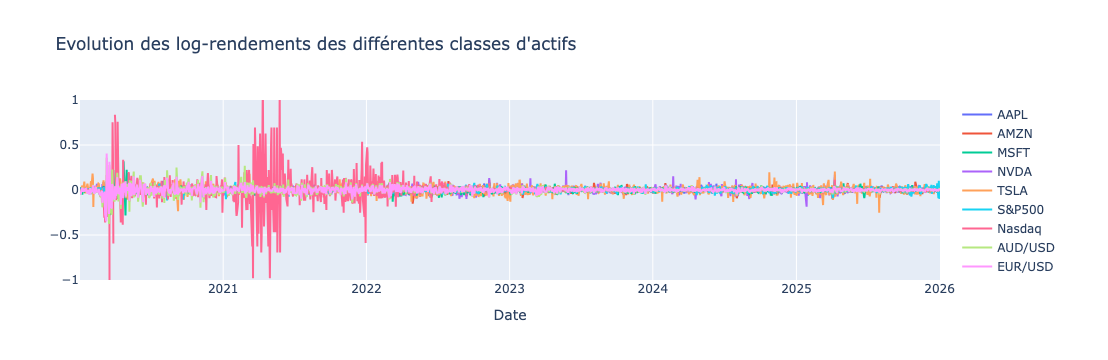

In [23]:
fig3 = go.Figure()


for ticker in log_returns.columns:
    fig3.add_trace(go.Scatter(
        x=log_returns.index, 
        y=log_returns[ticker],
        mode='lines',
        name=ticker
    ))

fig3.update_layout(
    title="Evolution des log-rendements des différentes classes d'actifs",
    xaxis_title='Date',
    hovermode='x unified',
)

fig3.update_yaxes(range=[-1, 1])

fig3.show()

#### Calcul des rolling correlations

In [14]:
window = 90  # fenêtre de 90 jours
ticker_pairs = list(combinations(log_returns.columns, 2))

rolling_corr = {
    f"{ticker1}_{ticker2}": log_returns[ticker1].rolling(window).corr(log_returns[ticker2])
    for ticker1, ticker2 in ticker_pairs
}

print(rolling_corr)

{'AAPL_AMZN': Date
2020-01-02         NaN
2020-01-03         NaN
2020-01-06         NaN
2020-01-07         NaN
2020-01-08         NaN
                ...   
2025-12-26    0.287453
2025-12-29    0.274868
2025-12-30    0.272274
2025-12-31    0.263991
2026-01-02    0.266185
Length: 1508, dtype: float64, 'AAPL_MSFT': Date
2020-01-02         NaN
2020-01-03         NaN
2020-01-06         NaN
2020-01-07         NaN
2020-01-08         NaN
                ...   
2025-12-26    0.188873
2025-12-29    0.179447
2025-12-30    0.178686
2025-12-31    0.177579
2026-01-02    0.180842
Length: 1508, dtype: float64, 'AAPL_NVDA': Date
2020-01-02         NaN
2020-01-03         NaN
2020-01-06         NaN
2020-01-07         NaN
2020-01-08         NaN
                ...   
2025-12-26    0.164671
2025-12-29    0.165511
2025-12-30    0.165575
2025-12-31    0.161079
2026-01-02    0.160285
Length: 1508, dtype: float64, 'AAPL_TSLA': Date
2020-01-02         NaN
2020-01-03         NaN
2020-01-06         NaN
2020-01-0

#### Etude à des dates précises (crises notamment)

La fonction week_date permet de ne pas tomber sur un jour du week-end (quand le marché est fermé) 

In [15]:
def week_date(date):
    pdate = pd.Timestamp(date)
    if pdate.day_name() not in ["Saturday", "Sunday"]:
        return date
    new_date = pdate + pd.Timedelta(days=2)
    return new_date
    
          

liste = []
liste.append(week_date('2020-03-15'))
print(liste)

[Timestamp('2020-03-17 00:00:00')]


In [16]:
rolling_corr_df = pd.DataFrame(rolling_corr)

corr_crise = rolling_corr_df.loc[week_date('2020-09-15')]
#print(corr_crise)

dates_clés = [week_date('2020-03-15'), week_date('2021-09-18'), week_date('2022-01-22')]
corr_multiple = rolling_corr_df.loc[dates_clés]
print(corr_multiple)

            AAPL_AMZN  AAPL_MSFT  AAPL_NVDA  AAPL_TSLA  AAPL_S&P500  \
Date                                                                  
2020-03-17        NaN        NaN        NaN        NaN          NaN   
2021-09-20   0.434621   0.677462   0.245801   0.207008     0.708292   
2022-01-24   0.643036   0.668899   0.605744   0.444109     0.728030   

            AAPL_Nasdaq  AAPL_AUD/USD  AAPL_EUR/USD  AAPL_GBP/USD  \
Date                                                                
2020-03-17          NaN           NaN           NaN           NaN   
2021-09-20     0.758232     -0.031069     -0.093797     -0.138841   
2022-01-24     0.786711     -0.003092      0.074584      0.055353   

            AAPL_USD/CHF  ...  Cuivre_Argent  Cuivre_Taux US 2 ans  \
Date                      ...                                        
2020-03-17           NaN  ...            NaN                   NaN   
2021-09-20     -0.050027  ...       0.498909              0.046080   
2022-01-24     -0.

In [17]:
rg_dates = pd.date_range(start='2020-01-01', end='2025-12-31', freq='W')
print(f"Nombre de dates : {len(rg_dates)}")
corr_matrices = []
dates_trouvées = [] 

for date in rg_dates:
    date += pd.Timedelta(days=1)
    if date in rolling_corr_df.index:
        corr_series = rolling_corr_df.loc[date]
        corr_matrices.append(corr_series)
        dates_trouvées.append(date)
        print(f"✓ {date} trouvée")
    else:
        print(f"✗ {date} non trouvée")

# Créer le DataFrame avec seulement les dates trouvées
corr_df = pd.DataFrame(corr_matrices, index=dates_trouvées)
print(corr_df)

Nombre de dates : 313
✓ 2020-01-06 00:00:00 trouvée
✓ 2020-01-13 00:00:00 trouvée
✗ 2020-01-20 00:00:00 non trouvée
✓ 2020-01-27 00:00:00 trouvée
✓ 2020-02-03 00:00:00 trouvée
✓ 2020-02-10 00:00:00 trouvée
✗ 2020-02-17 00:00:00 non trouvée
✓ 2020-02-24 00:00:00 trouvée
✓ 2020-03-02 00:00:00 trouvée
✓ 2020-03-09 00:00:00 trouvée
✓ 2020-03-16 00:00:00 trouvée
✓ 2020-03-23 00:00:00 trouvée
✓ 2020-03-30 00:00:00 trouvée
✓ 2020-04-06 00:00:00 trouvée
✓ 2020-04-13 00:00:00 trouvée
✓ 2020-04-20 00:00:00 trouvée
✓ 2020-04-27 00:00:00 trouvée
✓ 2020-05-04 00:00:00 trouvée
✓ 2020-05-11 00:00:00 trouvée
✓ 2020-05-18 00:00:00 trouvée
✗ 2020-05-25 00:00:00 non trouvée
✓ 2020-06-01 00:00:00 trouvée
✓ 2020-06-08 00:00:00 trouvée
✓ 2020-06-15 00:00:00 trouvée
✓ 2020-06-22 00:00:00 trouvée
✓ 2020-06-29 00:00:00 trouvée
✓ 2020-07-06 00:00:00 trouvée
✓ 2020-07-13 00:00:00 trouvée
✓ 2020-07-20 00:00:00 trouvée
✓ 2020-07-27 00:00:00 trouvée
✓ 2020-08-03 00:00:00 trouvée
✓ 2020-08-10 00:00:00 trouvée
✓ 2020

### 3. Heatmap

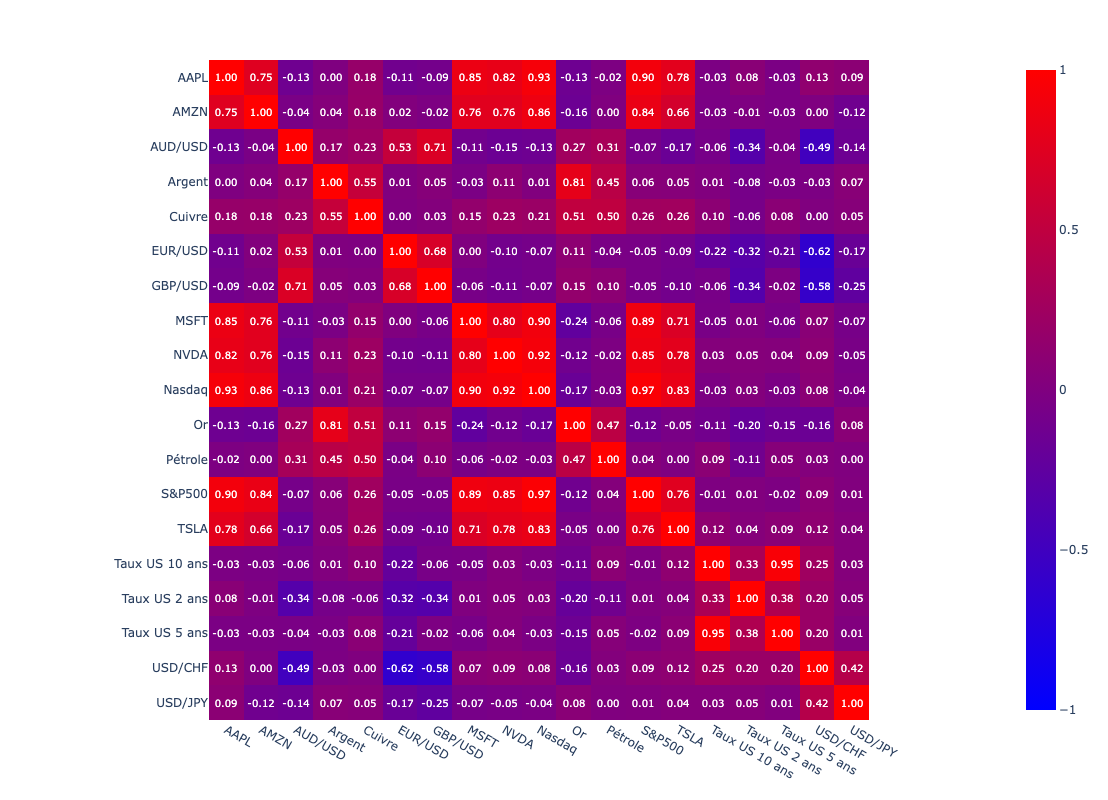

In [18]:
def create_corr_matrix_at_date(rolling_corr_dict, date):
    tickers = set()
    for pair in rolling_corr_dict.keys():
        parts = pair.rsplit('_', 1)
        if len(parts) == 2:
            tickers.add(parts[0])
            tickers.add(parts[1])
    
    tickers = sorted(list(tickers))
    n = len(tickers)
    matrix = np.eye(n)
    
    for pair, series in rolling_corr_dict.items():
        parts = pair.rsplit('_', 1)
        if len(parts) == 2:
            t1, t2 = parts
            i = tickers.index(t1)
            j = tickers.index(t2)
            try:
                corr_value = series.loc[date]
                matrix[i, j] = corr_value
                matrix[j, i] = corr_value
            except:
                pass
    
    return pd.DataFrame(matrix, index=tickers, columns=tickers)


date = '2022-07-15'
corr_matrix = create_corr_matrix_at_date(rolling_corr, week_date(date))



fig4 = px.imshow(corr_matrix, 
                color_continuous_scale='bluered',
                zmin=-1, zmax=1,
                text_auto='.2f')

fig4.update_layout(
    width=900, 
    height=800   
)

fig4.show()
